In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('./Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


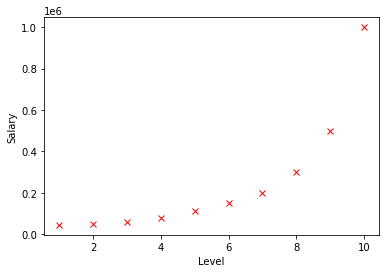

In [63]:
plt.plot(data['Level'], data['Salary'], 'rx')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [64]:
x = np.array([data['Level']]).T # this becomes vector (column vector)
y = np.array(data['Salary']) # row vector

In [65]:
#bias
x = np.hstack((np.ones((x.shape[0], 1)), x)) # [1 x]

In [66]:
# adding polynomial terms
# theta0 + theta1*x + theta2*x2 + theta3*x3
x = np.hstack((
        x,
        (x[:, 1]**2).reshape((x.shape[0], 1)),
        (x[:, 1]**3).reshape((x.shape[0], 1))
    ))

In [67]:
#normalization
# x = (x-mean)/std
x[:, 1:] = (x[:, 1:] - np.mean(x[:, 1:], axis=0))/np.std(x[:, 1:])
#using inbuilt functions/methods to find meand and std values over dataset

In [68]:
#initializing random values for theta vector
theta = np.random.rand(x.shape[1])
predictions = np.dot(x, theta)

In [69]:
#implementing the cost function
def cost_function(x, y, theta):
    prediction = np.dot(x, theta)
    cost = np.mean(np.square(prediction - y))
    return cost

In [70]:
#gradient descent and training model

def polynomial_regression(x, y, theta, alpha, iterations):
    m = x.shape[0]
    for _ in range(iterations):
        theta = theta - alpha*(1/m)*np.dot(x.T, np.dot(x, theta)-y)
        if _ % (iterations/10) == 0:
            print(f"cost: {cost_function(x, y, theta)}")
    return theta

# alpha = 0.001
# loss = []
# for _ in range(10000):
#     theta = theta - alpha*(1/m)*(np.dot(x.T, np.dot(x, theta) - y))
#     loss.append(cost_function(x, y, theta))
#     if _%(iterations/10) == 0:
#         print(f"cost: {cost_function(x, y, theta)}")
# return theta

In [76]:
theta = polynomial_regression(x, y, theta, 0.005, 50000)

cost: 5313022913.240404
cost: 5256478182.405151
cost: 5201372929.555522
cost: 5147670466.006201
cost: 5095335038.176297
cost: 5044331803.755913
cost: 4994626808.4800205
cost: 4946186963.494384
cost: 4898980023.2984
cost: 4852974564.250033


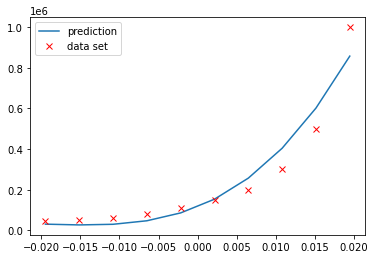

In [77]:
prediction = np.dot(x, theta)
plt.plot(x[:, 1], prediction, label='prediction')
plt.plot(x[:, 1], y, 'rx', label='data set')
plt.legend()

In [78]:
loss = np.sum(y-prediction)
loss

1.4028046280145645e-08